### Problem Statement & Business Case

Marketing is crucial for the growth and sustainability of any business. Marketers can help engage customers, grow revenue, build the company's brand and increase sales. One of the responsibilities of the marketers is to know customers and identify their needs. If there is enough data about customers, data science can be applied for market segmentation. In this case study, the bank has extensive data on their customers for the past 6 months. As a marketing team at the bank we will divide customers into at least 3 distinctive groups to launch a targetted ad marketing campaign.  <BR><br>
Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

### Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Explanation of each independent features
1. CUSTID: Identification of Credit Card holder 
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Exploratory Data Analysis

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Fill up the missing values with mean of the MINIMUM_PAYMENTS and CREDIT_LIMIT

In [6]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [7]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [8]:
df['MINIMUM_PAYMENTS'].isnull().sum(), df['CREDIT_LIMIT'].isnull().sum()

(0, 0)

Let's check if we have duplicated entries in the data

In [9]:
df.duplicated().sum()

0

Let's drop Customer ID since it has no meaning here 

In [10]:
df.drop("CUST_ID", axis = 1, inplace= True)

In [11]:
n = len(df.columns)
n

17

In [12]:
all_columns = [c for c in df.columns]

corr_matrix = df[all_columns].corr()

for x in range(len(all_columns)):
    corr_matrix.iloc[x,x] = 0.0
    
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,0.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,0.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,0.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,0.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,0.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,0.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,0.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,0.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,0.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,0.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<AxesSubplot:>

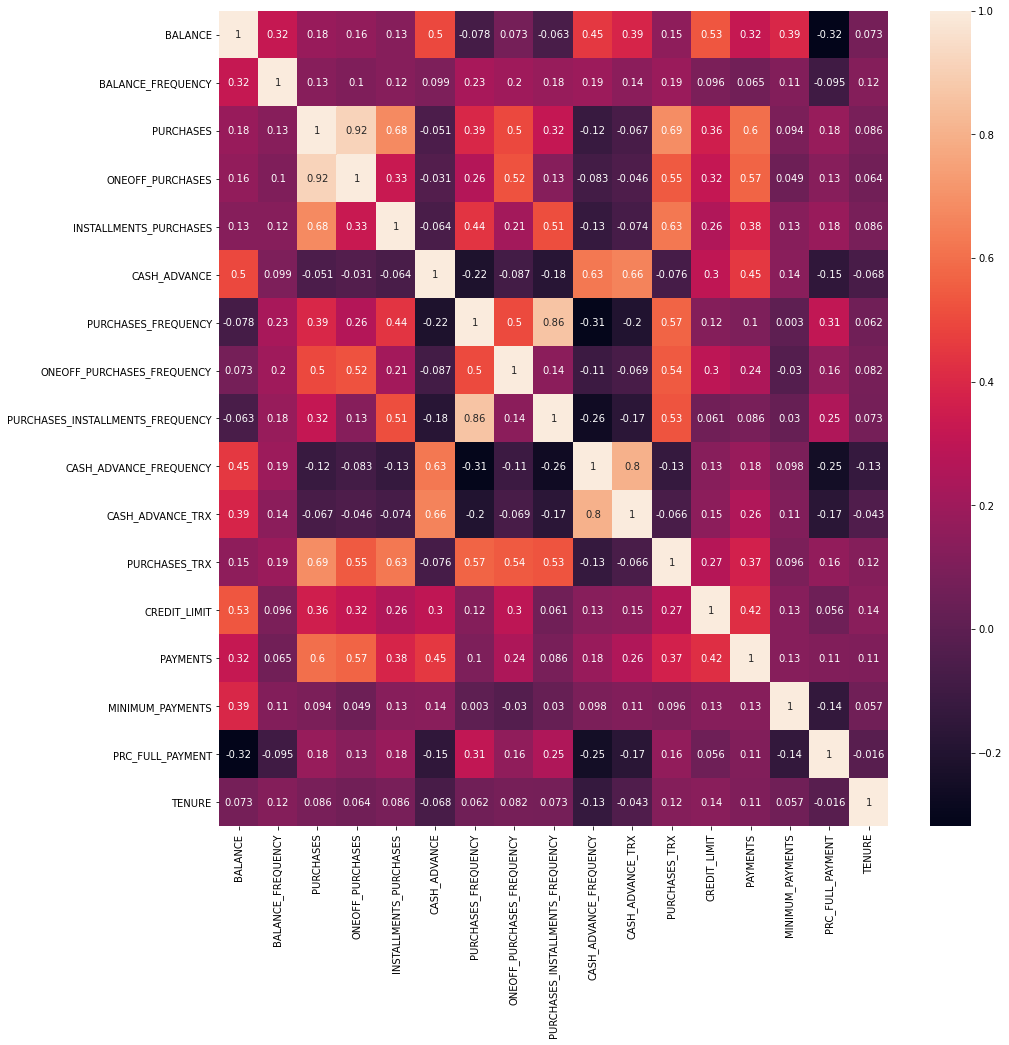

In [13]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlations, annot = True)

In [14]:
# Pairwise maximal correlations
corr_matrix.abs().idxmax()

BALANCE                                                 CREDIT_LIMIT
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                           ONEOFF_PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                              PURCHASES
CREDIT_LIMIT                                                 BALANCE
PAYMENTS                                                   PURCHASES
MINIMUM_PAYMENTS                  

'PURCHASES' have high correlation with ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX, CREDIT_LIMIT and PAYMENTS. 
Also, there is a strong positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.

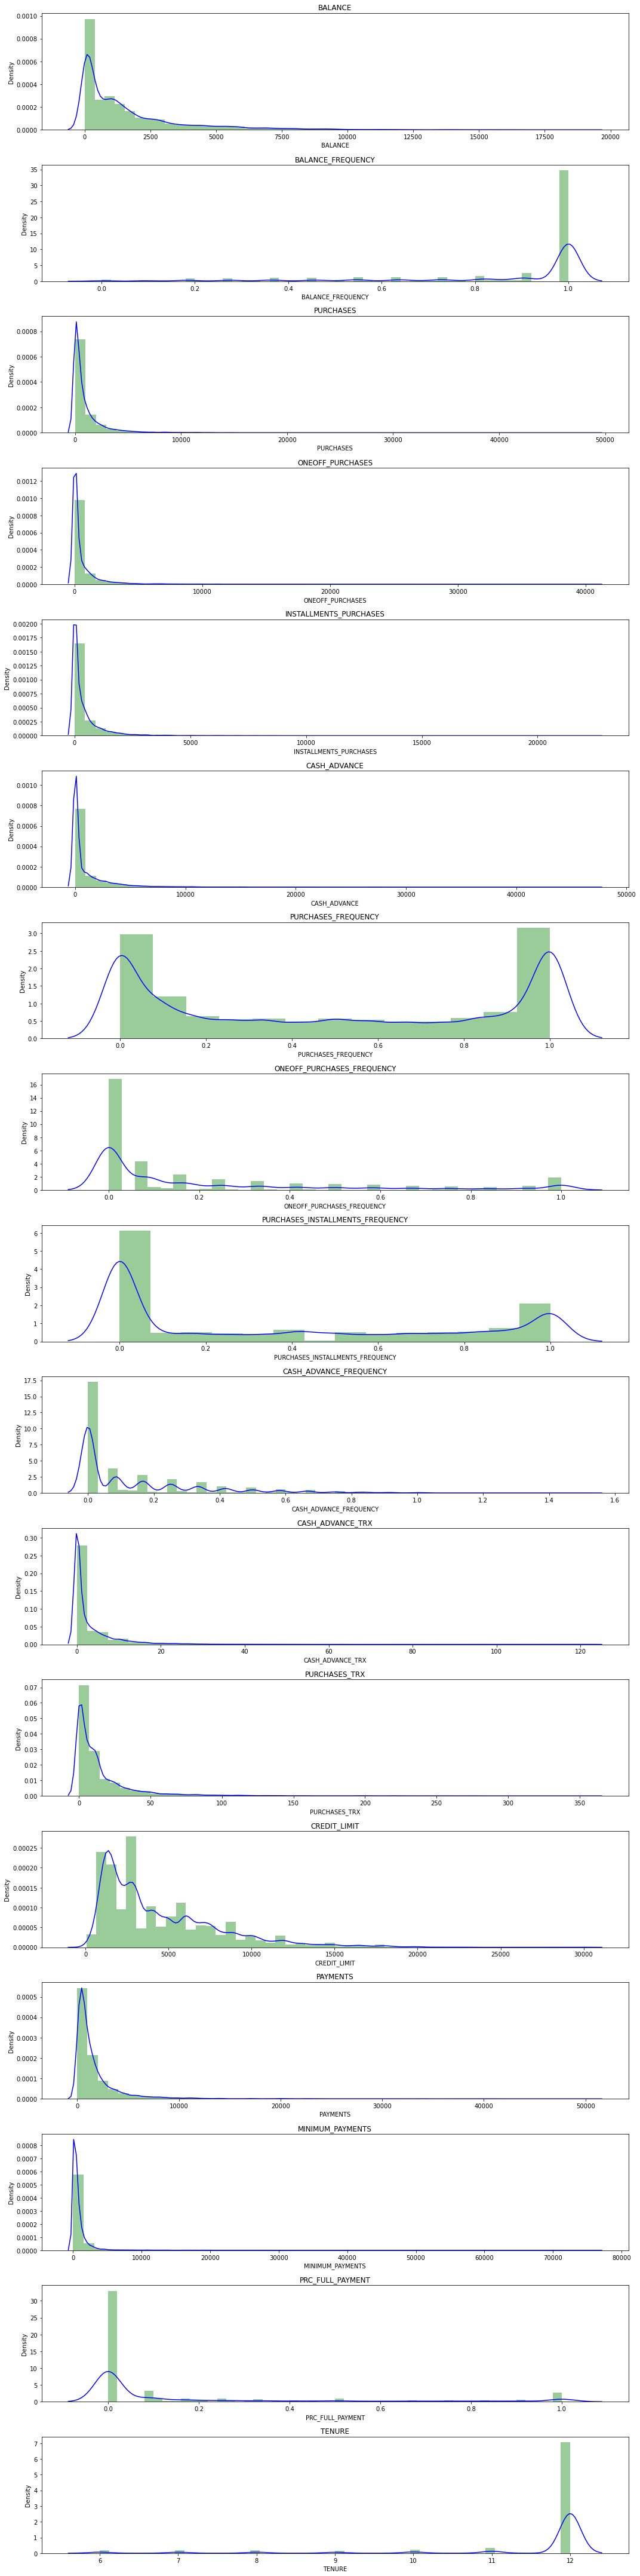

In [15]:
# distplot() function accepts the data variable as an argument and returns the plot with the density distribution

plt.figure(figsize=(15,60))
for i in range(n):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "label": "KDE",'bw': 0.1}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

In [16]:
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers.
# A small number of customers pay their balance in full.
# Most of the customers are more than 11 years tenure.

### Scale the Data with StandardScaler

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

### Theory behind the K-Means Clustering Algorithm 

K-Means is an unspurvised learning clustering algorithm, and works by grouping some data points together using unlabelled data. <br>The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

- K-Means Algorithm Steps:
    1. Choose number of cluster 'k'
    2. Select random K points that are going to be the centroids for each cluster
    3. Assign each data points to the nearest centroid to create k number of clusters
    4. Calculate new centroid for each cluster
    5. Reassign each data points to the closest centroid
    6. Go to step 4 and repeat until the algorithm stop

### Find the optimal number of clusters using Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

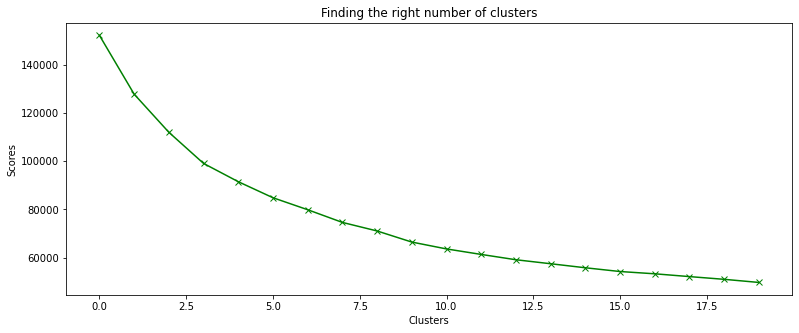

In [19]:
scores_kmeans = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_kmeans.append(kmeans.inertia_) 
    
plt.figure(figsize=(13,5))
plt.plot(scores_kmeans, 'bx-',c='green')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [22]:
clusters_df=pd.DataFrame({'num_clusters':range(1,21),'cluster_errors':scores_kmeans})
clusters_df

,num_clusters,cluster_errors
0,1,152150.000000
1,2,127784.883943
2,3,111986.782648
3,4,99074.258989
4,5,91502.265865
5,6,84852.718719
6,7,79883.525533
7,8,74624.742119
8,9,71077.648670
9,10,66479.023379


### Apply K-Means Method

In [23]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(df_scaled)
kmeans_labels = kmeans.labels_
kmeans_labels.shape, kmeans_labels.max(), kmeans_labels.min()

((8950,), 5, 0)

In [24]:
kmeans.cluster_centers_.shape

(6, 17)

In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers      

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.135123,0.427736,0.921160,0.873666,0.572961,-0.309052,1.086851,1.842932,0.537947,-0.405279,-0.319083,1.177741,0.686887,0.371713,-0.027039,0.435511,0.271101
1,-0.014757,0.371990,-0.344788,-0.223275,-0.404950,-0.084636,-0.825119,-0.334680,-0.769951,0.128431,-0.030240,-0.470109,-0.335692,-0.262335,-0.031105,-0.450938,-0.006792
2,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
3,-0.697825,-2.121466,-0.312918,-0.231058,-0.315296,-0.306912,-0.559277,-0.418961,-0.464264,-0.484403,-0.357813,-0.425470,-0.208910,-0.220974,-0.256026,0.261788,-0.164840
4,1.595015,0.377103,-0.209799,-0.152139,-0.216652,1.942739,-0.457571,-0.191450,-0.411604,1.891136,1.841683,-0.251848,0.964296,0.767154,0.513171,-0.392541,-0.091374
5,-0.396319,0.307914,-0.066460,-0.244972,0.292877,-0.365538,0.966873,-0.376439,1.141937,-0.461102,-0.357001,0.124520,-0.328761,-0.249544,-0.055342,0.341464,-0.027350


In [26]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans[:15]

array([4, 1, 5, 4, 4, 3, 5, 3, 4, 2, 3, 4, 3, 3, 4], dtype=int32)

Concatenate the clusters labels to our original dataframe

In [27]:
df_cluster_kmeans = pd.concat([df, pd.DataFrame({'cluster':kmeans_labels})], axis = 1)
df_cluster_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


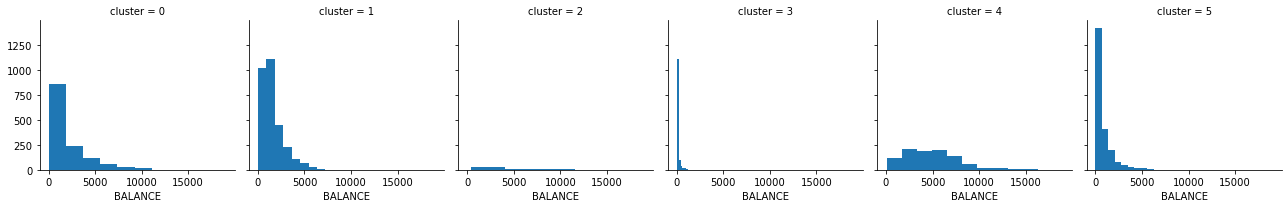

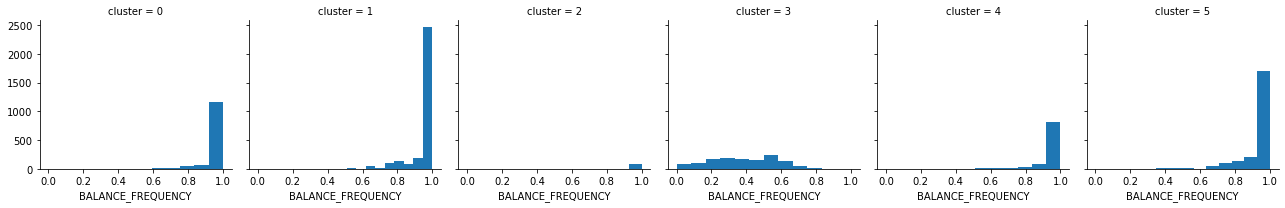

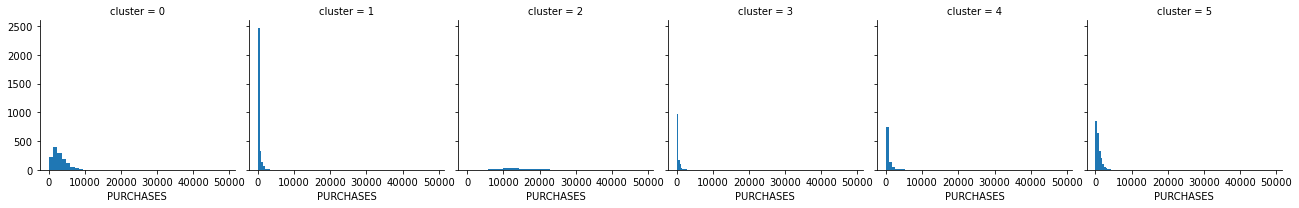

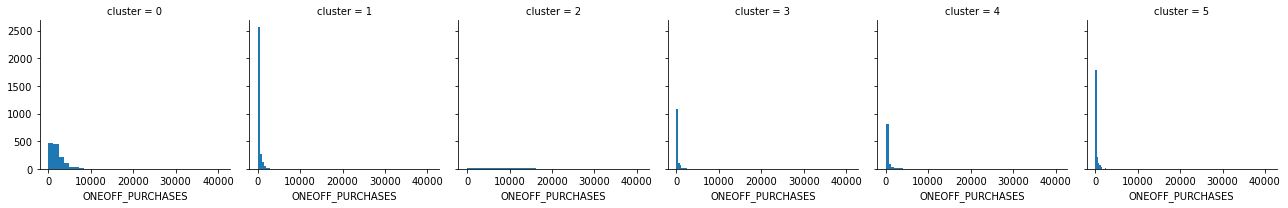

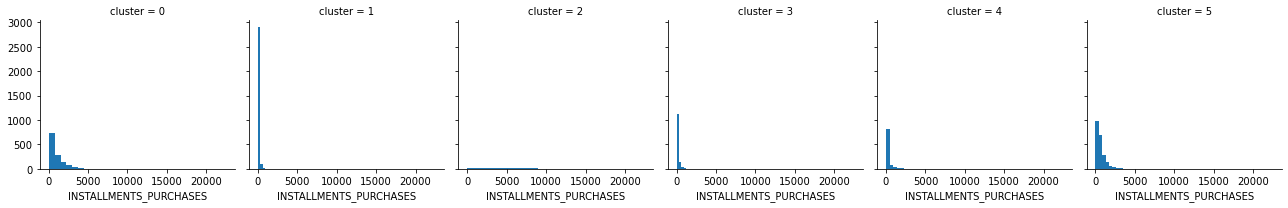

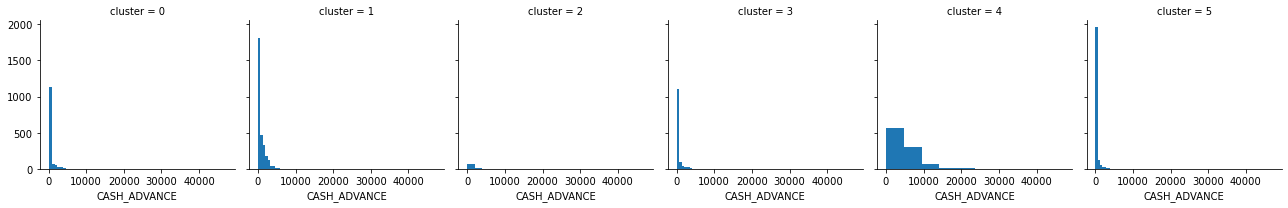

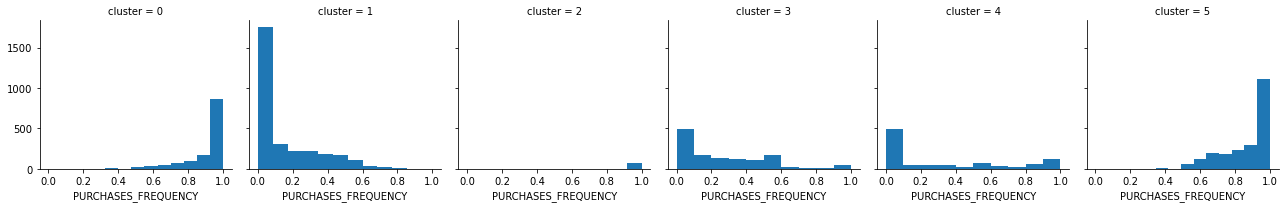

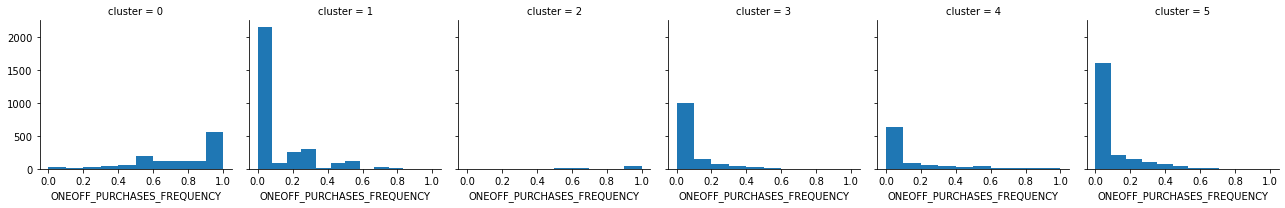

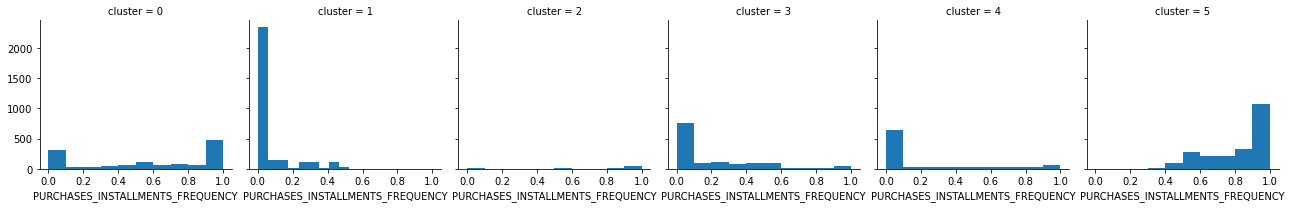

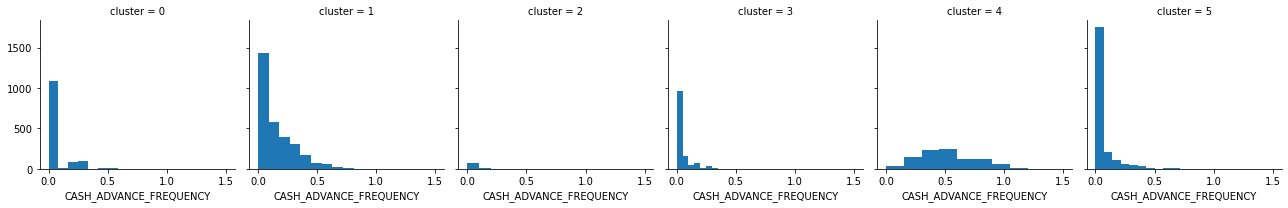

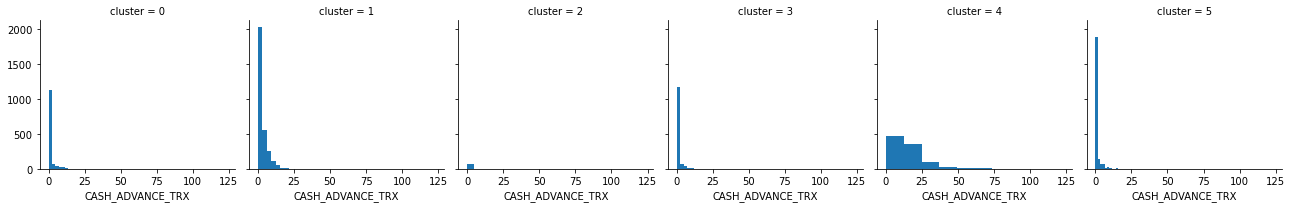

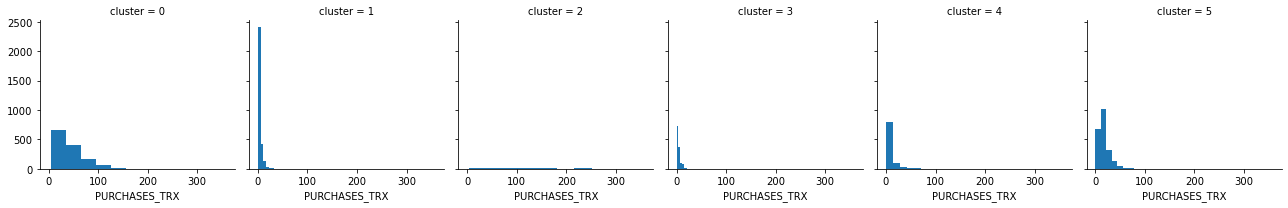

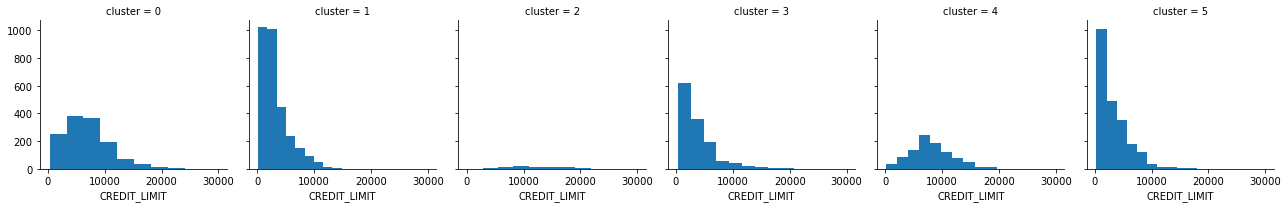

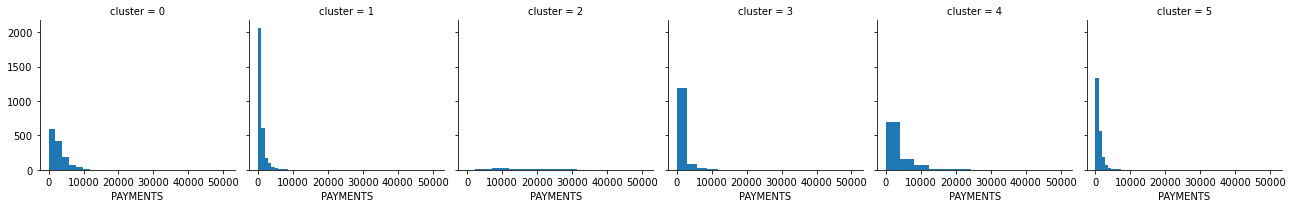

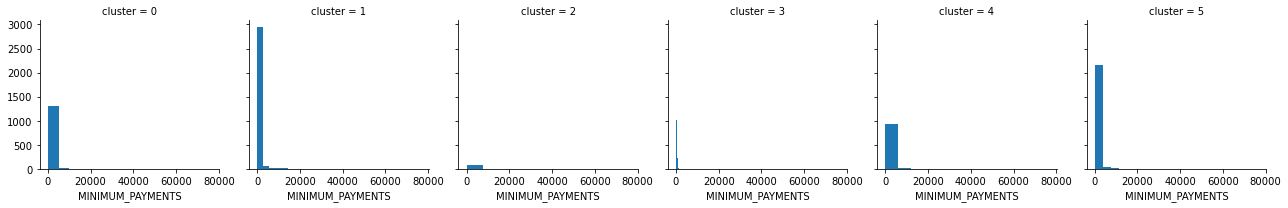

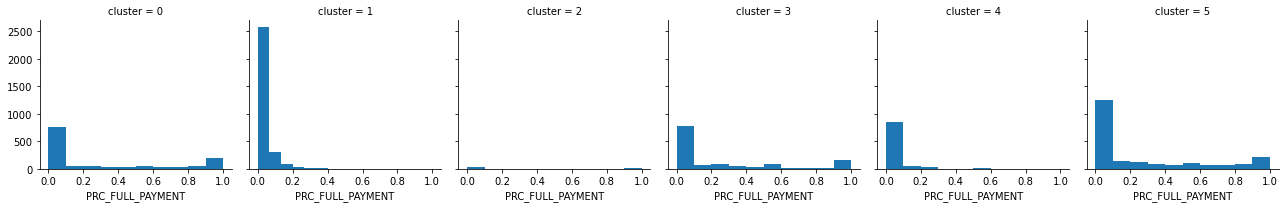

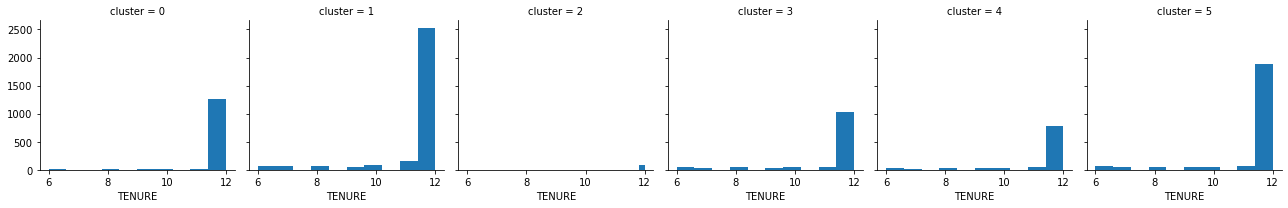

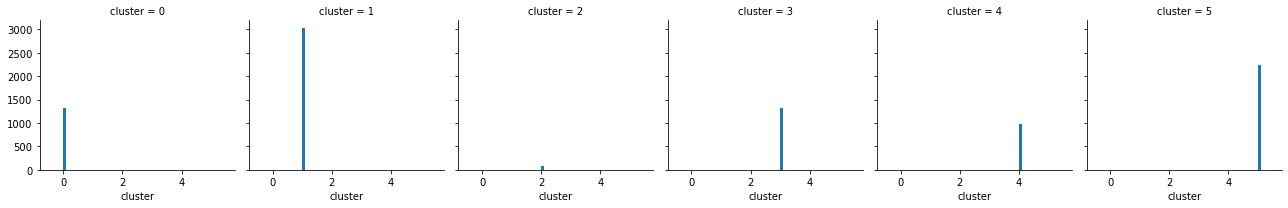

In [28]:
for c in df_cluster_kmeans:
    grid= sns.FacetGrid(df_cluster_kmeans, col='cluster')
    grid.map(plt.hist, c)

We can clearly see how the group of customers are segmented according to their consumer behaviors such as a group who takes more cash in advance, who makes all types of purchases, high spenders with high credit limits, who makes expensive purchases and who don't spend much money.

### Theory behind the Hierarchical Agglomerative Clustering

Agglomerative Clustering is a bottom-up apprach. It recursively merges the pair of clusters that minimally increases a given linkage distance. The results of hirerachical clustering are usually presented in a dendrogram, which shows sequence of merges and distances. Height of the branches in the 'dendrogram' shows you what is most similar. 
- Distance Metrics 
    1. Euclidean: Continous Data
    2. Manhattan: High Dimensions
    3. Hamming: Categories
    4. Cosine: Word Counts   


- Linkage Criteria
    1. single-linkage: The closest point in each cluster
    2. complete-linkage: The furthest point in each cluster
    2. centroid: The average of each cluster

### Apply Hierarchical Agglomerative Clustering Method

In [29]:
hac=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hac.fit(df_scaled)
hac_labels = hac.labels_
hac_labels[:5]

array([0, 2, 1, 0, 0])

In [30]:
hac_labels.shape, hac_labels.max(), hac_labels.min()

((8950,), 5, 0)

In [31]:
y_hat = hac.fit_predict(df_scaled)
np.unique(y_hat), y_hat.shape

(array([0, 1, 2, 3, 4, 5]), (8950,))

Retrieve unique clusters

In [32]:
clusters = np.unique(hac_labels)
clusters

array([0, 1, 2, 3, 4, 5])

### Dendrogram for Hierarchical Clustering

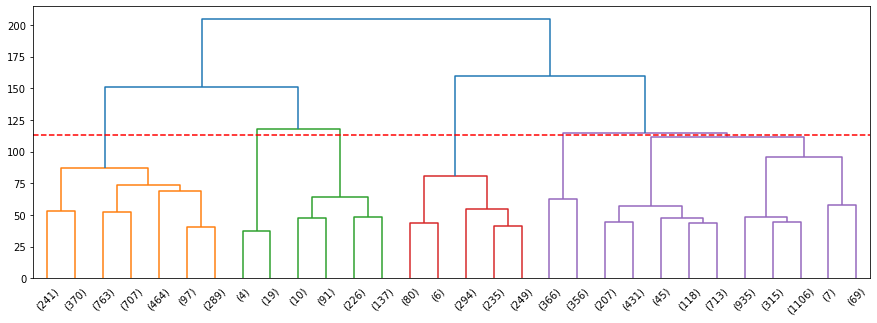

In [33]:
Z = sch.linkage(df_scaled, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = sch.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

plt.axhline(y=113, color='red', linestyle='--')
plt.show()

Concatenate the clusters labels to our original dataframe

In [34]:
df_cluster_hac = pd.concat([df, pd.DataFrame({'cluster':hac_labels})], axis = 1)
df_cluster_hac.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [35]:
df_cluster_hac.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1082.354421,0.770180,281.636908,173.571059,108.436954,570.266436,0.213852,0.067879,0.143102,0.093814,1.830208,3.778763,3555.794784,1083.796057,869.841214,0.093621,11.758490
1,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376
2,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667
3,3184.721917,0.989440,5672.306078,3606.399440,2067.199741,369.871576,0.946771,0.746491,0.769221,0.054203,1.084052,78.133621,8785.021552,5137.783379,1430.938438,0.252812,11.950431
4,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
5,1084.053860,0.861913,510.836620,284.932285,225.945886,1339.497691,0.502005,0.136134,0.357290,0.219346,3.878116,7.232687,2861.108033,744.422126,402.965792,0.215341,7.789474


In [36]:
silhouette_score_AggClustering = silhouette_score(df_scaled, hac_labels, metric='euclidean')
print('Silhouette Score: %.4f' % silhouette_score_AggClustering)

Silhouette Score: 0.1734


### Overview of Principal Component Analysis

PCA is an unsupervised machine learning algorithm, performs dimentionality reduction while attempting at keeping the oringinal information unchanged. It works by trying to find a new set of features called components. Components are composites of the uncorrelated given input features. 

In [38]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp[0]

array([-1.6822189, -1.0764567])

- Create a dataframe with the two components

In [39]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076457
1,-1.138293,2.506455
2,0.969679,-0.383505
3,-0.873627,0.043156
4,-1.599433,-0.688583


- Concatenate the clusters labels to the dataframe

In [40]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':hac_labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076457,0
1,-1.138293,2.506455,2
2,0.969679,-0.383505,1
3,-0.873627,0.043156,0
4,-1.599433,-0.688583,0


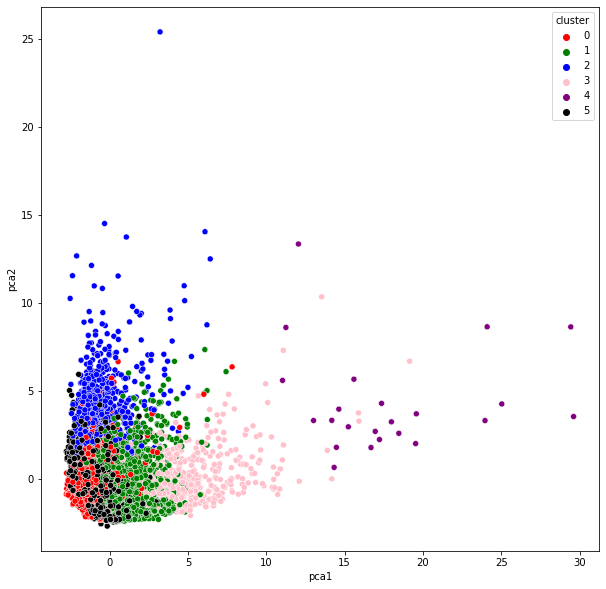

In [41]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, 
                     palette =['red','green','blue','pink','purple', 'black'])
plt.show()

### Theory behind the AutoEncoders

- AutoEncoders are a type of ANN that are used to perform a task of data encoding (representation learning). <br>
- AutoEncoders use the same input data for the input and output. It works by adding a bottleneck in the network.<br>
- This bottleneck forces the network to create a compressed version of the original input. <br> 
- Autoencoders work well if correlations exists between input data, if all input data is independent it performs poorly.

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [43]:
encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [44]:
df_scaled.shape

(8950, 17)

In [45]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 38ms/step - loss: 0.6918
Epoch 2/25
70/70 [==============================] - 3s 38ms/step - loss: 0.2987
Epoch 3/25
70/70 [==============================] - 3s 38ms/step - loss: 0.2348
Epoch 4/25
70/70 [==============================] - 3s 43ms/step - loss: 0.2016
Epoch 5/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1676
Epoch 6/25
70/70 [==============================] - 3s 44ms/step - loss: 0.1484
Epoch 7/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1398
Epoch 8/25
70/70 [==============================] - 4s 50ms/step - loss: 0.1341
Epoch 9/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1224
Epoch 10/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1090
Epoch 11/25
70/70 [==============================] - 3s 47ms/step - loss: 0.1091
Epoch 12/25
70/70 [==============================] - 4s 50ms/step - loss: 0.0951
Epoch 13/25
70/70 [==================

In [46]:
autoencoder.save_weights('autoencoder.h5')

In [47]:
pred = encoder.predict(df_scaled)
pred.shape

(8950, 10)

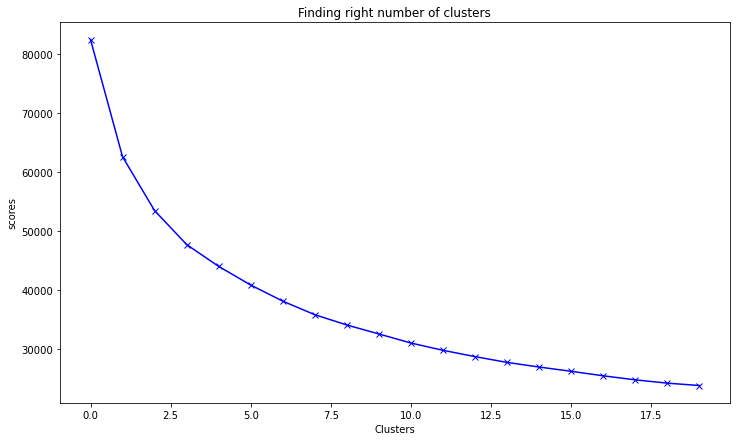

In [48]:
scores_encoder_kmeans = []

range_values = range(1, 21)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_encoder_kmeans.append(kmeans.inertia_)

plt.figure(figsize=(12,7))
plt.plot(scores_encoder_kmeans, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

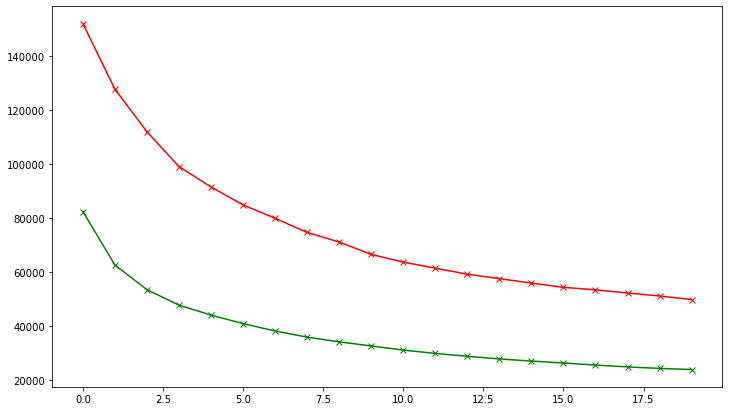

In [50]:
plt.figure(figsize=(12,7))
plt.plot(scores_kmeans, 'bx-', color = 'r')
plt.plot(scores_encoder_kmeans, 'bx-', color = 'g')

#### Cluster Customers using pred dataframe with 10 features obtained from encoder by dividing customers into four distinctive groups. 

In [51]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [52]:
df_cluster_en = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_en.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [53]:
grouped_customers = df_cluster_en.groupby(['cluster']).mean().round(1)
grouped_customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3117.0,0.9,455.6,275.7,180.0,3380.2,0.3,0.1,0.2,0.4,10.7,6.9,5432.8,2668.3,1758.6,0.1,10.2
1,1109.1,0.9,513.4,288.1,225.6,453.0,0.4,0.1,0.3,0.1,1.6,8.7,3858.8,994.1,566.3,0.1,11.9
2,6225.5,1.0,9205.2,5936.9,3268.2,6530.8,0.8,0.5,0.7,0.4,21.4,72.9,11879.2,15269.1,6380.9,0.2,11.6
3,1556.1,1.0,3178.9,1893.2,1286.2,267.0,0.9,0.5,0.8,0.0,1.0,46.9,5780.7,2916.6,752.0,0.4,11.2


In [54]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df_en = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df_en.head()

,pca1,pca2
0,-1.497823,-0.093645
1,0.229747,-1.539731
2,-1.170813,0.400301
3,-1.917417,-0.001241
4,-1.734677,-0.178163


In [55]:
pca_df_en = pd.concat([pca_df_en, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_en.head()

,pca1,pca2,cluster
0,-1.497823,-0.093645,1
1,0.229747,-1.539731,0
2,-1.170813,0.400301,1
3,-1.917417,-0.001241,1
4,-1.734677,-0.178163,1


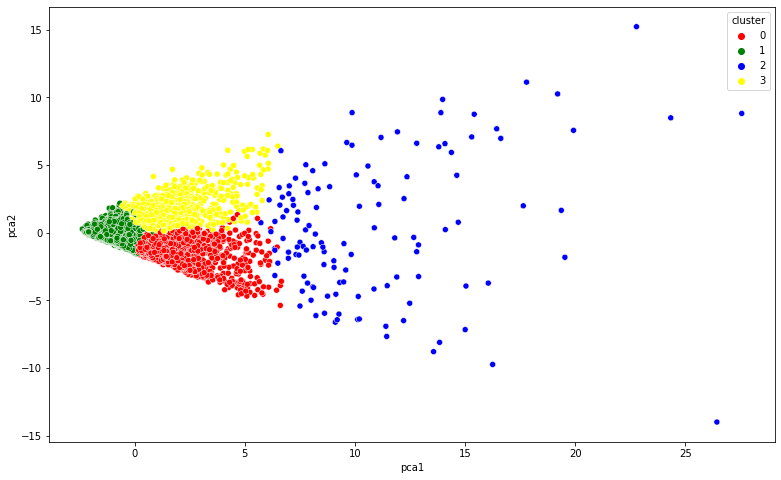

In [56]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df_en, palette =['red','green','blue','yellow'])
plt.show()

# THE END

# THANK YOU FOR READING 